<a href="https://colab.research.google.com/github/SohelRaja/Customer-Churn-Analysis/blob/master/Ensemble%20Learning/Other%20Classifiers/Decision%20Tree/Decision_Tree_Customer_Churn_best_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Analysis with Decision Tree #

### Importing Required Libraries ###

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Importing Dataset From Github Repository ###

In [3]:
url = 'https://raw.githubusercontent.com/SohelRaja/Customer-Churn-Analysis/master/Decision%20Tree/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url)
telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Data Analysis ###

In [4]:
telco_arr = np.array(telco.columns)
telco_arr

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
def unique_value_check():
    len_col_telco = len(telco_arr)
    print("Column Name : No. of unique value")
    print("---------------------------------")
    for i in range(1,len_col_telco):
        val = len(np.unique(telco[telco_arr[i]]))
        print(i," : ",telco_arr[i],":",val,end='\t')
        if(val<10):
            print("---> ",telco[telco_arr[i]].unique().tolist())
        else:
            print("---> [Too Much Values]")
unique_value_check()

Column Name : No. of unique value
---------------------------------
1  :  gender : 2	--->  ['Female', 'Male']
2  :  SeniorCitizen : 2	--->  [0, 1]
3  :  Partner : 2	--->  ['Yes', 'No']
4  :  Dependents : 2	--->  ['No', 'Yes']
5  :  tenure : 73	---> [Too Much Values]
6  :  PhoneService : 2	--->  ['No', 'Yes']
7  :  MultipleLines : 3	--->  ['No phone service', 'No', 'Yes']
8  :  InternetService : 3	--->  ['DSL', 'Fiber optic', 'No']
9  :  OnlineSecurity : 3	--->  ['No', 'Yes', 'No internet service']
10  :  OnlineBackup : 3	--->  ['Yes', 'No', 'No internet service']
11  :  DeviceProtection : 3	--->  ['No', 'Yes', 'No internet service']
12  :  TechSupport : 3	--->  ['No', 'Yes', 'No internet service']
13  :  StreamingTV : 3	--->  ['No', 'Yes', 'No internet service']
14  :  StreamingMovies : 3	--->  ['No', 'Yes', 'No internet service']
15  :  Contract : 3	--->  ['Month-to-month', 'One year', 'Two year']
16  :  PaperlessBilling : 2	--->  ['Yes', 'No']
17  :  PaymentMethod : 4	--->  ['Electro

In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


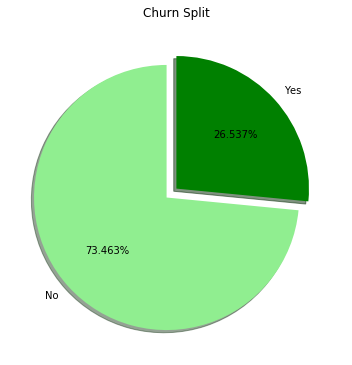

In [8]:
from collections import Counter

labels, values = zip(*Counter(telco["Churn"]).items())
colors = ['lightgreen', 'green']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[5, 5])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.3f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

### Data Cleaning ###

In [9]:
df = telco.drop(['customerID','TotalCharges'],axis=1)
df = df.apply(LabelEncoder().fit_transform)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,1


### Data Preprocessing, & Feature Importance ###

In [0]:
#Spliting df to features data and target data
X = df.iloc[:,:-1]
X1 = df[['tenure','InternetService','PhoneService']]
y = df[["Churn"]]

In [0]:
#Spliting of Training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.1, random_state=42)

In [0]:
#scaling the data
scaler = StandardScaler()
SS_X_train = scaler.fit_transform(X_train)
SS_X_test = scaler.fit_transform(X_test)
SS_X1_train = scaler.fit_transform(X1_train)
SS_X1_test = scaler.fit_transform(X1_test)

### Training of the model with the help of CART(Gini Index) Algorithm ###

In [13]:
# accuracy in different level for gini index
list_accuracy = []
for i in range(1,25):
  dtree_g_l = DecisionTreeClassifier(criterion='gini',max_depth=i)
  dtree_g_l.fit(SS_X_train,y_train)
  predictions_l = dtree_g_l.predict(SS_X_test)
  acc_gini_l = accuracy_score(y_test,predictions_l)*100
  list_accuracy.append(acc_gini_l)
  print("Accuracy: {} % for depth= {}".format(acc_gini_l,i)) 
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))

Accuracy: 72.4822695035461 % for depth= 1
Accuracy: 75.0354609929078 % for depth= 2
Accuracy: 78.86524822695036 % for depth= 3
Accuracy: 79.14893617021276 % for depth= 4
Accuracy: 80.85106382978722 % for depth= 5
Accuracy: 80.70921985815603 % for depth= 6
Accuracy: 79.8581560283688 % for depth= 7
Accuracy: 79.00709219858156 % for depth= 8
Accuracy: 77.87234042553192 % for depth= 9
Accuracy: 76.59574468085107 % for depth= 10
Accuracy: 75.74468085106383 % for depth= 11
Accuracy: 75.0354609929078 % for depth= 12
Accuracy: 74.7517730496454 % for depth= 13
Accuracy: 75.46099290780141 % for depth= 14
Accuracy: 73.19148936170212 % for depth= 15
Accuracy: 73.61702127659574 % for depth= 16
Accuracy: 72.76595744680851 % for depth= 17
Accuracy: 72.05673758865248 % for depth= 18
Accuracy: 71.77304964539007 % for depth= 19
Accuracy: 73.90070921985816 % for depth= 20
Accuracy: 71.48936170212767 % for depth= 21
Accuracy: 71.34751773049646 % for depth= 22
Accuracy: 72.3404255319149 % for depth= 23
Acc

In [22]:
list_accuracy = []
for i in range(1,25):
  dtree_g_l = DecisionTreeClassifier(criterion='gini',max_depth=i)
  dtree_g_l.fit(SS_X1_train,y1_train)
  predictions_l = dtree_g_l.predict(SS_X1_test)
  acc_gini_l = accuracy_score(y1_test,predictions_l)*100
  list_accuracy.append(acc_gini_l)
  print("Accuracy: {} % for depth= {}".format(acc_gini_l,i)) 
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))

Accuracy: 72.4822695035461 % for depth= 1
Accuracy: 78.86524822695036 % for depth= 2
Accuracy: 80.42553191489363 % for depth= 3
Accuracy: 80.42553191489363 % for depth= 4
Accuracy: 81.41843971631205 % for depth= 5
Accuracy: 80.85106382978722 % for depth= 6
Accuracy: 80.99290780141844 % for depth= 7
Accuracy: 80.99290780141844 % for depth= 8
Accuracy: 80.99290780141844 % for depth= 9
Accuracy: 80.99290780141844 % for depth= 10
Accuracy: 81.41843971631205 % for depth= 11
Accuracy: 81.41843971631205 % for depth= 12
Accuracy: 81.41843971631205 % for depth= 13
Accuracy: 81.41843971631205 % for depth= 14
Accuracy: 81.41843971631205 % for depth= 15
Accuracy: 81.41843971631205 % for depth= 16
Accuracy: 81.41843971631205 % for depth= 17
Accuracy: 81.41843971631205 % for depth= 18
Accuracy: 81.41843971631205 % for depth= 19
Accuracy: 81.41843971631205 % for depth= 20
Accuracy: 81.41843971631205 % for depth= 21
Accuracy: 81.41843971631205 % for depth= 22
Accuracy: 81.41843971631205 % for depth= 2

In [0]:
dtree_g = DecisionTreeClassifier(criterion='gini',max_depth=5)
dtree_g.fit(SS_X_train,y_train)
predictions = dtree_g.predict(SS_X_test)

In [16]:
important_gini = dtree_g.feature_importances_
important_f_gini = pd.Series(important_gini, X.columns[:])
important_f_gini.sort_values(ascending=False, inplace=True)
important_f_gini

Contract            0.544187
tenure              0.150973
OnlineSecurity      0.133837
InternetService     0.085264
MonthlyCharges      0.054220
SeniorCitizen       0.008986
StreamingMovies     0.007104
PhoneService        0.007084
OnlineBackup        0.005735
StreamingTV         0.001974
Dependents          0.000636
TechSupport         0.000000
DeviceProtection    0.000000
PaymentMethod       0.000000
MultipleLines       0.000000
PaperlessBilling    0.000000
Partner             0.000000
gender              0.000000
dtype: float64

In [17]:
cla_gini = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_gini)

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.93      0.88       511
           1       0.72      0.50      0.59       194

    accuracy                           0.81       705
   macro avg       0.77      0.71      0.73       705
weighted avg       0.80      0.81      0.80       705



In [18]:
con_gini = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_gini)

Confusion matrix:

 [[473  38]
 [ 97  97]]


In [19]:
acc_gini = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_gini,"%")

Accuracy: 80.85106382978722 %


### Training of the model with the help of ID3(Entropy) Algorithm ###

In [20]:
# accuracy in different level for entropy
list_accuracy = []
for i in range(1,25):
  dtree_e_l = DecisionTreeClassifier(criterion='entropy',max_depth=i)
  dtree_e_l.fit(SS_X_train,y_train)
  predictions_l = dtree_e_l.predict(SS_X_test)
  acc_entropy_l = accuracy_score(y_test,predictions_l)*100
  list_accuracy.append(acc_entropy_l)
  print("Accuracy: {} % for depth= {}".format(acc_entropy_l,i)) 
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))

Accuracy: 72.4822695035461 % for depth= 1
Accuracy: 75.0354609929078 % for depth= 2
Accuracy: 78.86524822695036 % for depth= 3
Accuracy: 79.14893617021276 % for depth= 4
Accuracy: 80.99290780141844 % for depth= 5
Accuracy: 80.42553191489363 % for depth= 6
Accuracy: 80.70921985815603 % for depth= 7
Accuracy: 80.28368794326242 % for depth= 8
Accuracy: 79.00709219858156 % for depth= 9
Accuracy: 76.17021276595744 % for depth= 10
Accuracy: 77.30496453900709 % for depth= 11
Accuracy: 76.17021276595744 % for depth= 12
Accuracy: 76.59574468085107 % for depth= 13
Accuracy: 75.177304964539 % for depth= 14
Accuracy: 75.0354609929078 % for depth= 15
Accuracy: 73.47517730496453 % for depth= 16
Accuracy: 72.90780141843972 % for depth= 17
Accuracy: 72.62411347517731 % for depth= 18
Accuracy: 72.90780141843972 % for depth= 19
Accuracy: 71.77304964539007 % for depth= 20
Accuracy: 71.77304964539007 % for depth= 21
Accuracy: 73.04964539007092 % for depth= 22
Accuracy: 72.3404255319149 % for depth= 23
Acc

In [23]:
list_accuracy = []
for i in range(1,25):
  dtree_e_l = DecisionTreeClassifier(criterion='entropy',max_depth=i)
  dtree_e_l.fit(SS_X1_train,y1_train)
  predictions_l = dtree_e_l.predict(SS_X1_test)
  acc_entropy_l = accuracy_score(y1_test,predictions_l)*100
  list_accuracy.append(acc_entropy_l)
  print("Accuracy: {} % for depth= {}".format(acc_entropy_l,i)) 
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))

Accuracy: 72.4822695035461 % for depth= 1
Accuracy: 78.86524822695036 % for depth= 2
Accuracy: 80.56737588652483 % for depth= 3
Accuracy: 80.56737588652483 % for depth= 4
Accuracy: 81.56028368794325 % for depth= 5
Accuracy: 80.85106382978722 % for depth= 6
Accuracy: 80.99290780141844 % for depth= 7
Accuracy: 80.99290780141844 % for depth= 8
Accuracy: 80.99290780141844 % for depth= 9
Accuracy: 81.41843971631205 % for depth= 10
Accuracy: 81.41843971631205 % for depth= 11
Accuracy: 81.41843971631205 % for depth= 12
Accuracy: 81.41843971631205 % for depth= 13
Accuracy: 81.41843971631205 % for depth= 14
Accuracy: 81.41843971631205 % for depth= 15
Accuracy: 81.41843971631205 % for depth= 16
Accuracy: 81.41843971631205 % for depth= 17
Accuracy: 81.41843971631205 % for depth= 18
Accuracy: 81.41843971631205 % for depth= 19
Accuracy: 81.41843971631205 % for depth= 20
Accuracy: 81.41843971631205 % for depth= 21
Accuracy: 81.41843971631205 % for depth= 22
Accuracy: 81.41843971631205 % for depth= 2

In [0]:
dtree_e = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtree_e.fit(SS_X_train,y_train)
predictions = dtree_e.predict(SS_X_test)

In [25]:
important_entropy = dtree_e.feature_importances_
important_f_entropy = pd.Series(important_entropy, X.columns[:])
important_f_entropy.sort_values(ascending=False, inplace=True)
important_f_entropy

Contract            0.578925
tenure              0.124289
OnlineSecurity      0.101149
MonthlyCharges      0.082269
InternetService     0.066505
StreamingMovies     0.014538
SeniorCitizen       0.013413
PhoneService        0.007086
OnlineBackup        0.006865
StreamingTV         0.002681
PaymentMethod       0.002282
TechSupport         0.000000
DeviceProtection    0.000000
MultipleLines       0.000000
PaperlessBilling    0.000000
Dependents          0.000000
Partner             0.000000
gender              0.000000
dtype: float64

In [26]:
cla_entropy = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_entropy)

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.93      0.88       511
           1       0.72      0.50      0.59       194

    accuracy                           0.81       705
   macro avg       0.78      0.71      0.73       705
weighted avg       0.80      0.81      0.80       705



In [27]:
con_entropy = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_entropy)

Confusion matrix:

 [[474  37]
 [ 97  97]]


In [28]:
acc_entropy = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_entropy,"%")

Accuracy: 80.99290780141844 %


### Graph For Tree Visualization ###

In [29]:
#importing requires Libraries
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


#### Graph for CART(gini index) ####

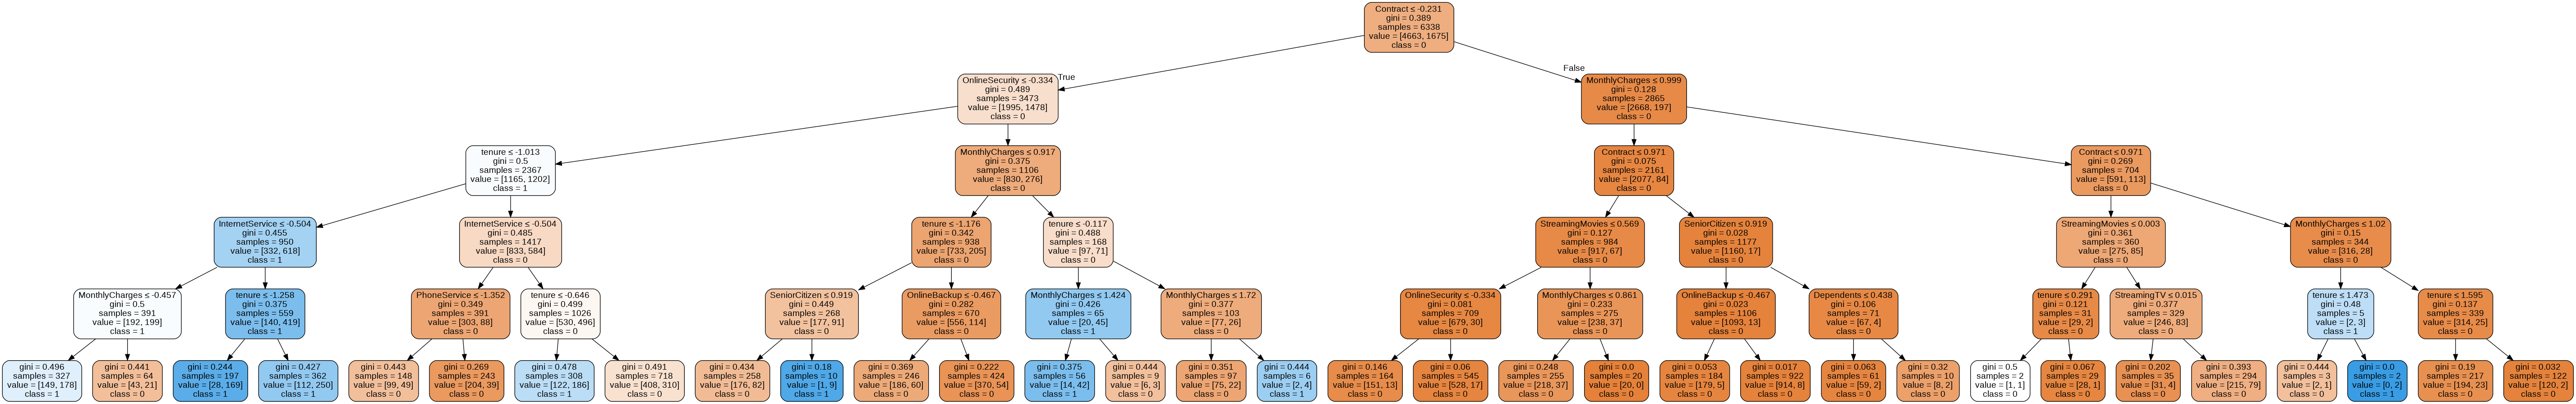

In [30]:
dot_data = StringIO()
export_graphviz(dtree_g, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#### Graph for ID3(entropy) ####

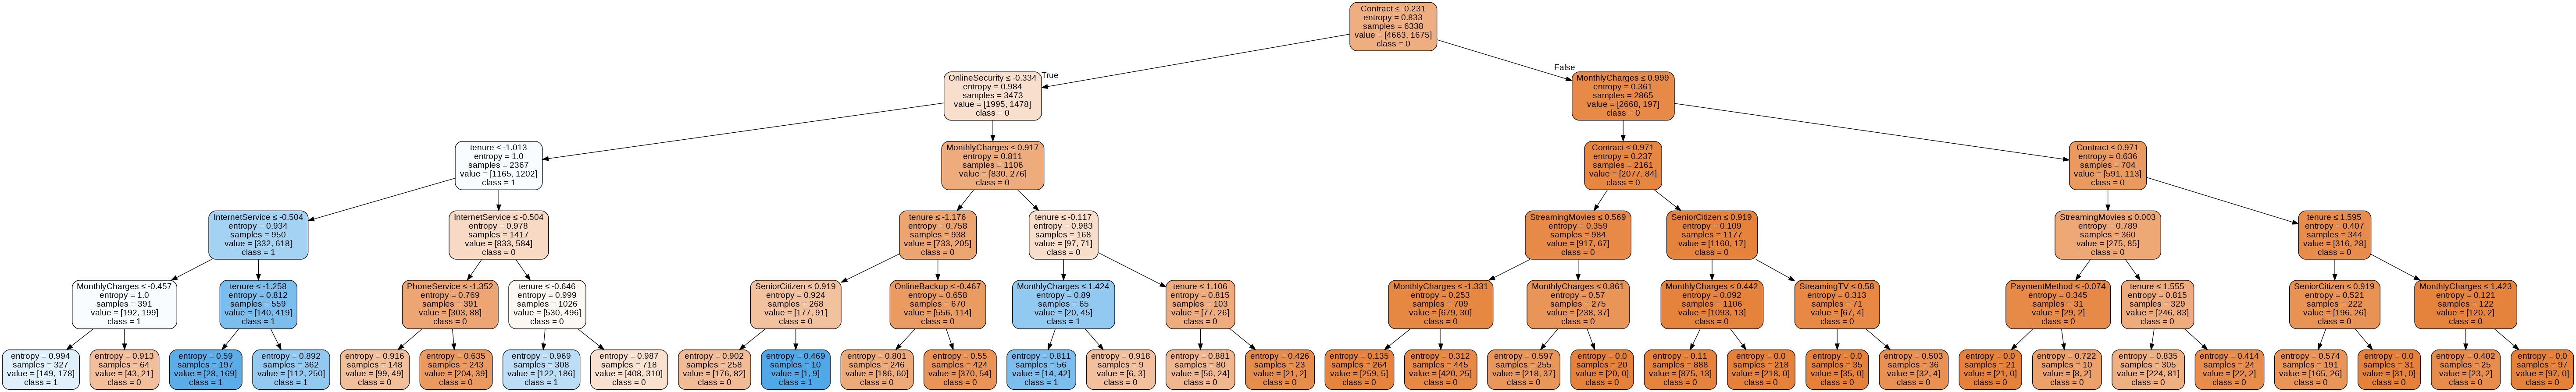

In [31]:
dot_data = StringIO()
export_graphviz(dtree_e, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree2.png')
Image(graph.create_png())